# Introduction:


## What is a Brain Tumor?  
A brain tumor is a **growth of cells in the brain or near it**, as described by the **Mayo Clinic** ([source](https://www.mayoclinic.org/diseases-conditions/brain-tumor/symptoms-causes/syc-20350084)). Brain tumors can develop in brain tissue or in nearby locations, including the nerves, the pituitary gland, the pineal gland, and the membranes covering the surface of the brain.  

Brain tumors are categorized as primary brain tumors, which originate in the brain, or secondary brain tumors, which occur when cancer spreads to the brain from other parts of the body (metastatic brain tumors).  

Primary brain tumors can be either:  
- Noncancerous (benign): These may grow over time and press on the brain tissue.  
- Cancerous (malignant): These grow more quickly, and their cancer cells can invade and destroy brain tissue.  

The size and impact of a brain tumor can vary significantly. Some tumors cause immediate symptoms and are found early, while others may grow large before being detected. Treatments depend on the type, size, and location of the tumor, with common approaches including surgery and radiation therapy.


---

## Current Medical Attitudes About AI in Medicine

AI is increasingly being recognized for its potential in transforming health care. The **2024 AMA survey** ([source](https://www.ama-assn.org/practice-management/digital/big-majority-doctors-see-upsides-using-health-care-ai)) gathered responses from **1,081 physicians**, divided into two groups: 524 "tech adopters" and 556 "tech averse" respondents. Despite varying levels of comfort with technology, physicians identified key areas where AI could be most beneficial in healthcare:

- **Diagnostic ability:** 72% of respondents believe AI can enhance diagnostic accuracy.  
- **Work efficiency:** 69% see AI as a tool for streamlining workflows and reducing administrative burdens.  
- **Clinical outcomes:** 61% think AI could improve patient outcomes by supporting better decision-making.  

Additionally, 56% of physicians highlighted AI’s potential to improve care coordination, patient convenience, and patient safety.  

However, physicians also expressed guarded enthusiasm. While 41% of respondents reported being equally excited and concerned about AI, key concerns include:  

- Potential impacts on the patient-physician relationship  
- Risks to patient privacy 
- Over-reliance on AI overriding clinical judgment  

### Transparency and Trust
Physicians emphasized the importance of transparency and ethical AI use. This includes ensuring that:  
- Patients are aware when AI is used in their care.  
- Automated systems do not withhold necessary treatments or reduce access to care.  
- AI tools are designed with equity in mind, avoiding systematic biases against specific groups.  

AMA President Jesse Ehrenfeld, MD, MPH, noted the critical need for human intervention points in AI decision-making and called for consistent regulatory guidance and post-market surveillance of AI technologies to ensure continued safety and performance.

### Enthusiasm for AI Applications
Surveyed physicians identified several areas where AI can be particularly helpful, such as:  
- Automating documentation of billing codes and visit notes (54%)  
- Streamlining insurance prior authorization (48%)  
- Generating discharge instructions and care plans (43%)  

AI adoption in medicine requires balancing the potential for innovation with safeguards to maintain trust, equity, and patient-centered care.

---

## About the Dataset

The dataset used for this project is the **Brain Tumor MRI Dataset** created by Masoud Nickparvar ([source](https://www.mayoclinic.org/diseases-conditions/brain-tumor/symptoms-causes/syc-20350084)), which is publicly available on Kaggle. 

The dataset is a combination of three sources:  
- **figshare**
- **SARTAJ dataset**
- **Br35H**


This dataset is specifically designed for the classification of brain tumors and contains 7,023 MRI images categorized into four classes:

1. **Glioma Tumor**  
2. **Meningioma Tumor**  
3. **No Tumor**  
4. **Pituitary Tumor**

The dataset provides MRI images of varying sizes, which require preprocessing (e.g., resizing) to improve model performance.

### Original Dataset Statistics
The dataset was originally split into separate **training** and **testing** datasets:  
- **Training Dataset:**
  - Glioma Tumor: 1321 images  
  - Meningioma Tumor: 1339 images  
  - No Tumor: 1595 images  
  - Pituitary Tumor: 1457 images  

- **Testing Dataset:**
  - Glioma Tumor: 300 images  
  - Meningioma Tumor: 306 images  
  - No Tumor: 405 images  
  - Pituitary Tumor: 300 images  

### Adjustments for the Project
For this project, an **additional testing dataset** was created called "Testing Final" to evaluate the best-performing model and determine how well it performs on unseen data, simulating real-world conditions. This was achieved by randomly sampling 200 images from each category in the original training dataset, resulting in a balanced testing dataset of 800 images. To avoid confusion, the original provided testing dataset was renamed as "Validation dataset."

This adjustment modified the original train/test split from approximately 90%/10% to a new split of 80%/20%, ensuring a comprehensive evaluation of the model on data it has never encountered before.

After the adjustments, the updated dataset statistics are as follows:

- **Training Dataset:**
  - Glioma Tumor: 1121 images  
  - Meningioma Tumor: 1139 images  
  - No Tumor: 1395 images  
  - Pituitary Tumor: 1257 images  

- **Validation Dataset:**
  - Glioma Tumor: 300 images  
  - Meningioma Tumor: 306 images  
  - No Tumor: 405 images  
  - Pituitary Tumor: 300 images  

- **Testing Dataset:**
  - Glioma Tumor: 200 images  
  - Meningioma Tumor: 200 images  
  - No Tumor: 200 images  
  - Pituitary Tumor: 200 images  

## Purpose of This Project

The purpose of this project is to advance the application of machine learning in real-world medical imaging scenarios, specifically using Convolutional Neural Networks (CNNs) to classify brain tumors. By working on this project, I aim to hone my technical skills in image classification while contributing to the growing field of AI in medicine. 


## Author and Last Updated

**Author:** Manreet Sohi  
**Last Updated:** January 2025

---

# Set up: 

## Load libraries: 

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as ts

## Load the directories where the datasets are located. 

The training dataset is used to teach the model. The model learns patterns in the data and updates its internal parameters to minimize prediction errors.<br>

The validation dataset is what the model will use to evaluate the model's performance after each training cycle.
It helps assess how well the model is learning and guides adjustments by calculating validation loss.<br>

The test dataset is what at the very end will analyze the performance of the best chosen model. It provides a final evaluation of the model's performance, ensuring it generalizes well to unseen data.
It helps analyze how the best model performs in real-world scenarios. <br>

In [3]:
# Define directory paths:
train_dir = 'Training'
valid_dir = 'Validation'
test_dir = 'Testing_final'

## Data Augmentation.
Normalize the pixel values to scale them from $[0, 255]$ down to the range $[0, 1]$. This helps the model train more efficiently by ensuring the input data is consistent and within a smaller, manageable range. It prevents large pixel values from overwhelming the learning process and improves the stability and speed of optimization during training.

In [4]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize pixel values to [0, 1]

valid_datagen = ImageDataGenerator(rescale=1.0/255) # Normalize pixel values to [0, 1]

test_datagen = ImageDataGenerator(rescale=1.0/255) # Normalize pixel values to [0, 1]

## Preprocess Data
Resize the training, validation and testing images to $250 \times 250$ pixels  for consistency since the images vary in size and group them into batches of 32. 

With `batches = 32`, the model processes 32 images (meaning 1 batch) at a time during training. After going through all 32 images in the batch, it computes the loss for that batch by comparing the predictions to the true labels. Then, it uses backpropagation to calculate the gradients of the loss with respect to the model's weights and updates those weights using the optimizer. This process repeats for each batch until the entire dataset has been processed (one epoch).

The `class_mode='categorical'` specifies that the labels are one-hot encoded for multi-class classification, and the `shuffle=False` in the test data ensures the order is preserved for consistent evaluation.

In [5]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(250, 250),
    batch_size=32,
    class_mode='categorical'
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(250, 250),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(250, 250),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to preserve order for evaluation
)

Found 4912 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


# Layer and Structure the CNN Model

Sequential is a model architecture in Keras that allows us to build a neural network layer by layer. This lets us customize how many layers of convolution and pooling we want, as well as how many dense layers to include.

## Convolution Layers (`Conv2D` + `MaxPooling2D`)

Since we defined `target_size = (250, 250)`, the input image dimensions are $250 \times 250$. For non-grayscale images, the depth is 3 (RGB), so the input shape becomes $250 \times 250 \times 3$. Grayscale or RGB only matters for the first convolutional layer, as the depth of the feature maps in subsequent layers depends on the number of kernels used.

The first convolutional layer uses 32 kernels of size $3 \times 3$, which produces 32 feature maps. The ReLU activation function is applied to introduce non-linearity:

$$
f(x) = \max(0, x)
$$

This means:
- Negative values are set to 0.
- Positive values remain unchanged.

After this layer, we have 32 feature maps, each sized $250 \times 250$.

A $2 \times 2$ window is used for max pooling, which selects the highest value in each $2 \times 2$ region. This reduces noise and makes the model less sensitive to small variations. Since max pooling halves the dimensions, the output size becomes $125 \times 125$.

This process is repeated with more convolutional layers and max pooling:
- A second layer with 64 kernels of size $3 \times 3$, followed by max pooling.
- A third layer with 128 kernels of size $3 \times 3$, followed by max pooling.

### Model Summary

1. 1st convolutional layer `Conv2D(32, (3, 3))`: Applies 32 kernels of size $3 \times 3$ to the input image with dimensions $250 \times 250 \times 3$ (RGB). Outputs 32 feature maps, each sized $250 \times 250$.
<br><br>
2. 1st max pooling layer `MaxPooling2D((2, 2))`: Reduces the dimensions by half using a $2 \times 2$ window. Outputs 32 feature maps, each sized $125 \times 125$.
<br><br>
3. 2nd convolutional layer `Conv2D(64, (3, 3))`: Applies 64 kernels of size $3 \times 3$ to the input from the previous layer. Outputs 64 feature maps, each sized $125 \times 125$.
<br><br>
4. 2nd max pooling layer `MaxPooling2D((2, 2))`: Further reduces the dimensions by half using a $2 \times 24$ window. Outputs 64 feature maps, each sized $62 \times 62$.
<br><br>
5. 3rd convolutional layer `Conv2D(128, (3, 3))`: Applies 128 kernels of size $3 \times 3$ to the input. Outputs 128 feature maps, each sized $62 \times 62$.
<br><br>
6. 3rd max pooling layer `MaxPooling2D((2, 2))`: Halves the dimensions for the final time using a $2 \times 2$ window. Outputs 128 feature maps, each sized $31 \times 31$.


## Dense Layers (`Flatten` + `Dense`)

After the final layer of convolution and max pooling is done, we take the output of the final convolution + max pooling layer, which is sized $$31 \times 31 \times 128$$, and flatten it into a 1D vector so it can be inputted into the dense layers.

`Flatten()` takes this and gives us a 1D vector of:

$$
31 \times 31 \times 128 = 123,008
$$

### Dense(512)

The flattened 1D vector is then inputted into the first dense layer `Dense(512)`, which has 512 neurons. Each connection between the input and neurons means there are:

$$
123,008 \times 512 = 62,974,976 \text{ connections}
$$

Each connection has a weight ($w$), and each neuron has a bias ($b$). Therefore, the total number of parameters in this layer is:

$$
123,008 \times 512 + 512 = 62,975,488 \text{ parameters}
$$

Each neuron calculates a weighted sum of all its connections:

$$
z = \sum_{i=1}^n w_i x_i + b
$$

Where:
- $w_i$: Weight of the $i^{th}$ connection.
- $x_i$: Input value of the $i^{th}$ connection.
- $b$: Bias term for the neuron.

The activation function for this layer is ReLU, as in the convolutional layers:

$$
f(x) = \max(0, x)
$$

These weights and biases are updated during backpropagation to improve the model after each batch.

### Dropout(0.5)

After this dense layer, a dropout layer is added with a rate of 0.5. This means that during each training step, 50% of the neurons are randomly "dropped" (ignored), preventing the model from relying too heavily on specific neurons. This helps reduce overfitting by ensuring the model generalizes better to unseen data.

---

### Dense(256)

The output of the previous layer, sized 512, is fed into the second dense layer `Dense(256)`, which has 256 neurons. This layer has:

$$
512 \times 256 = 131,072 \text{ connections}
$$

Adding biases for each neuron:

$$
512 \times 256 + 256 = 131,328 \text{ parameters}
$$

Again, each connection has a weight, and each neuron has a bias. The same ReLU activation function is applied, and the Dropout(0.5) layer follows this dense layer to reduce overfitting.

---

### Dense(128)

The third dense layer `Dense(128)` takes the output of the previous layer (256 neurons) and connects it to 128 neurons. This layer has:

$$
256 \times 128 = 32,768 \text{ connections}
$$

Including biases:

$$
256 \times 128 + 128 = 32,896 \text{ parameters}
$$

ReLU is again applied as the activation function, followed by another Dropout(0.5) to help with regularization.

---

### Output Layer: Dense(4)

Finally, the output layer `Dense(4)` connects the 128 neurons from the previous layer to 4 output neurons (for 4 classes). This layer has:

$$
128 \times 4 = 512 \text{ connections}
$$

Including biases for each output neuron:

$$
128 \times 4 + 4 = 516 \text{ parameters}
$$

The activation function here is Softmax, which converts the raw scores (logits) into probabilities:

$$
\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}
$$

Where:
- $\sigma(z_i)$: The probability for class $i$.
- $z_i$: The raw score (logit) for class $i$.
- $\sum_{j=1}^n e^{z_j}$: The sum of the exponentials of all logits for $n$ classes.

Softmax ensures that the probabilities sum to 1 and scales each output relative to the others. The highest probability determines the predicted class.

---

### Latter half model summary: Summary of Parameters
1. Dense(512): 62,975,488 parameters  
2. Dense(256): 131,328 parameters  
3. Dense(128): 32,896 parameters  
4. Dense(4): 516 parameters  

Total parameters across dense layers: 63,139,228.


In [6]:
# Model architecture
model = Sequential([
    
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(250, 250, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(4, activation='softmax')  # 4 classes
])

C:\Users\sohir\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Run and Assess the Model

`Learning rate = 0.001` specifies how drastically we want the model to update its parameters during optimization. A high learning rate causes the model to take large steps during parameter updates, which can lead to faster convergence but risks overshooting the optimal solution. Conversely, a low learning rate ensures smaller, more precise updates, allowing the model to converge more carefully but potentially requiring more training time to reach the optimal solution.


We will run this for 100 epochs, but with early stopping and `patience=10`. This means the training will stop if the validation loss does not improve for 10 consecutive epochs, or when 100 epochs are completed, whichever comes first. In this case, 100 epochs serve as an upper ceiling, giving the model enough room to continue improving as much as possible before overfitting. The best model, determined by the lowest validation loss, will be stored.














In [7]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=100,
    callbacks=[early_stopping, model_checkpoint]
)


C:\Users\sohir\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 461s 3s/step - accuracy: 0.4006 - loss: 1.3377 - val_accuracy: 0.7094 - val_loss: 0.7055
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 447s 3s/step - accuracy: 0.7598 - loss: 0.5817 - val_accuracy: 0.8017 - val_loss: 0.4697
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 447s 3s/step - accuracy: 0.8467 - loss: 0.3974 - val_accuracy: 0.8253 - val_loss: 0.4053
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 447s 3s/step - accuracy: 0.9068 - loss: 0.2624 - val_accuracy: 0.8940 - val_loss: 0.2532
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 404s 3s/step - accuracy: 0.9233 - loss: 0.2064 - val_accuracy: 0.9207 - val_loss: 0.2062
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.9541 - loss: 0.1323 - val_accuracy: 0.9359 - val_loss: 0.1837
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.9702 - loss: 0.0983 - val_accuracy: 0.9558 - val_loss: 0.1463
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9804 - loss: 0.0693 - 

## Observing Model Accuracy over epochs

Accuracy measures the percentage of correctly predicted samples out of the total samples. During training, training accuracy represents how well the model performs on the training data, while validation accuracy indicates how well the model generalizes to unseen data (validation set). Ideally, training and validation accuracies should increase together. If the training accuracy is high but validation accuracy stagnates or drops, it may indicate overfitting.

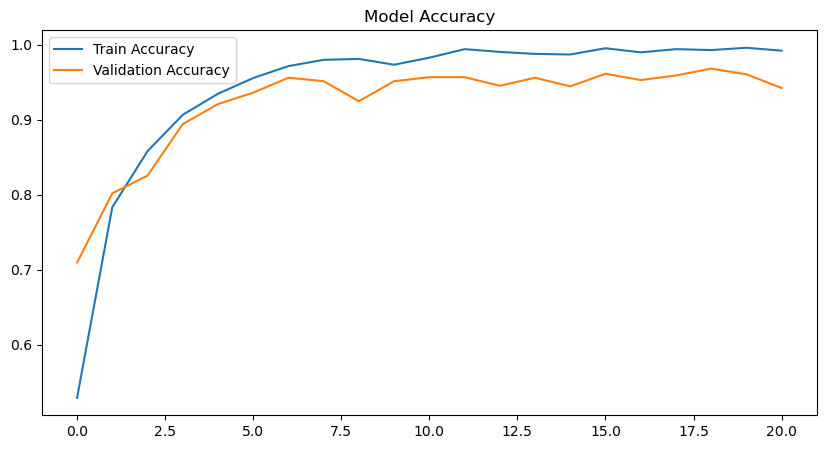

In [8]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

## Observing Model Loss over epochs

Loss, on the other hand, is a measure of the model's error. It quantifies how far off the model's predictions are from the true values. Like accuracy, we monitor training loss and validation loss. Training loss: Represents the model's error on the training data. Validation loss: Reflects the error on unseen validation data.
A decreasing training loss along with a decreasing validation loss suggests that the model is learning effectively. However, if the validation loss starts increasing while training loss decreases, it is a sign of overfitting, where the model performs well on the training data but struggles to generalize to new data.

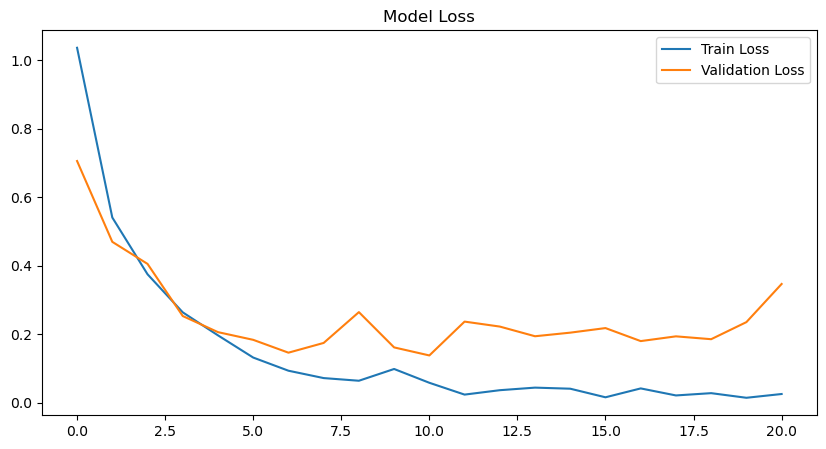

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# Load & Evaluate Best Model

Throughout the 21 epochs the model ran, `best_model = tf.keras.models.load_model` is used to load the best-performing model from those epochs, specifically the one with the lowest validation loss. This selection is based on the parameter we specified earlier in Section 4 while running the model: `monitor='val_loss'`. This means the model training process was designed to monitor the validation loss for each epoch and save the model that achieved the lowest validation loss as the `best_model`.

Additionally, we had previously loaded the test directory `test_dir = '7022_Testing_final'`, which contains **800 unseen MRI images** (200 from each category: glioma, meningioma, no tumor, and pituitary tumor). These images have never been encountered by the model during training or validation. To evaluate the model's performance in a **real-world scenario**, we will take the `best_model` and test it on these 800 unseen images. This will allow us to assess how well the model can identify and categorize the images into the correct tumor types or "no tumor."


## Accuracy, Precision, Recall & F1 Score:

To better understand the model’s performance, especially for imbalanced datasets or individual categories, we analyze the model's accuracy along with its precision, recall, and the F1 score.

1. **Accuracy** measures the proportion of correct predictions out of the total predictions made by the model:
   $$
   \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
   $$

   In our context, the **accuracy of .9400** means that the model correctly identified and categorized MRI images for 94 out of every 100 images it was tested on.

In [10]:
# Step 3: Load the Best Model and Evaluate
import tensorflow as tf  # Import TensorFlow

# Load the best model
best_model = tf.keras.models.load_model('best_model.keras')

# Evaluate on the test dataset
test_loss, test_accuracy = best_model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and calculate additional metrics
y_pred_probs = best_model.predict(test_data)  # Predicted probabilities
y_pred = y_pred_probs.argmax(axis=1)  # Convert probabilities to class labels
y_true = test_data.classes  # True labels

25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - accuracy: 0.9258 - loss: 0.3564
Test Loss: 0.2714, Test Accuracy: 0.9400
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 266ms/step


---
2. **Precision** measures how many of the positively predicted instances were actually correct. It is useful for understanding the model's ability to avoid false positives:  
   $$
   \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
   $$

   In our context, the **precision of 0.9403** indicates that when the model predicts a certain category (e.g., glioma), it is correct 94.03% of the time. This is important when false positives carry a significant cost, such as misdiagnosing a healthy individual.
   <br>

3. **Recall** (or sensitivity) measures how many of the actual positive instances were correctly identified by the model. It is useful for understanding the model's ability to avoid false negatives:
   $$
   \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
   $$

   In our context, the **recall of 0.9400** means that the model was able to correctly identify 94.00% of all true instances of a category (e.g., all glioma cases).  
   <br>

4. **F1 Score** is the harmonic mean of precision and recall, providing a single metric to balance these two aspects:
   $$
   \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

   In our context, the **F1 score of 0.9395** indicates a strong balance between precision and recall. This means the model is both good at identifying positive cases (high recall) and ensuring the predictions it makes are accurate (high precision). 
   <br>

In [11]:
# Precision, Recall, F1 Score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.9403
Recall: 0.9400
F1 Score: 0.9395


## Challenges and Future Work

### Current Performance
The model demonstrated strong overall performance with an **accuracy of 94%** across the 800 test images. Categories like "no tumor"** and "pituitary tumor" performed exceptionally well, each achieving an F1 score of 0.96, indicating a high level of precision and recall. However, upon closer inspection, the "meningioma" category shows room for improvement, with a slightly lower F1 score of 0.91. This suggests that the model has some difficulty distinguishing meningioma images from other categories.

The confusion matrix supports this observation, as there were **11 meningioma images misclassified as glioma** and **8 misclassified as "no tumor"**. These errors highlight the need to address the overlap or similarities in features between these categories.

### Future Improvements
To improve the model's performance and aim for a test accuracy closer to 97% or 98%, several steps can be taken:

1. **Increase Dataset Size**  
- Expanding the dataset with more diverse and high-quality images, particularly for categories like meningioma, can help the model learn better feature representations. This may include:
   - Collecting more MRI images from varied sources and imaging settings.
   - Augmenting the dataset with techniques like rotations, flips, brightness adjustments, and zooms, tailored specifically to amplify the unique features of each category.
<br>
2. **Class Imbalance Correction**  
- Oversample the **meningioma** class using data augmentation or ideally adding more unique meningioma MRI to give the model more training with classifying meningioma specifically. 
   - Use class weights during model training to give more importance to underperforming classes like meningioma.
<br>
3. **Fine-Tuning the Model**  
- Experiment with advanced techniques to improve the model's ability to generalize:
   - Adjust hyperparameters such as learning rate, batch size, and number of layers.
<br>
4. **Improve Feature Extraction**  
- Investigate the use of pretrained models like ResNet, Inception, or EfficientNet to leverage transfer learning. Pretrained models have already learned rich feature representations that can significantly boost performance on smaller datasets.
<br>
5. **Address Similarity Between Classes**  
- Focus on distinguishing features between glioma, meningioma, and "no tumor" categories:
   - Use feature visualization techniques to understand what the model is learning.
   - Incorporate domain-specific knowledge (e.g., medical expertise) to preprocess images and highlight subtle features like tumor boundaries or textures.
<br>
6. **Model Ensemble Techniques**  
- Combine predictions from multiple models (e.g., ensemble of CNNs) to improve overall performance and reduce misclassifications.
<br>
7. **Validate with External Datasets**  
- Evaluate the model on external datasets from different sources to ensure robustness and generalizability. This will also help identify edge cases where the model struggles.

### Contextualizing the Goal
Improving the test accuracy from 94% to 97-98% would make the model even more reliable for real-world applications, particularly in a medical setting where misclassifications can have significant consequences. By focusing on the meningioma class and implementing the above steps, we aim to make the model more precise and robust for all categories, ensuring it can assist medical professionals effectively.


In [12]:
# Classification Report
class_labels = list(test_data.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.94      0.93      0.93       200
  meningioma       0.95      0.88      0.91       200
     notumor       0.95      0.97      0.96       200
   pituitary       0.93      0.99      0.96       200

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800



In [13]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[185  10   0   5]
 [ 11 175   8   6]
 [  1   0 194   5]
 [  0   0   2 198]]


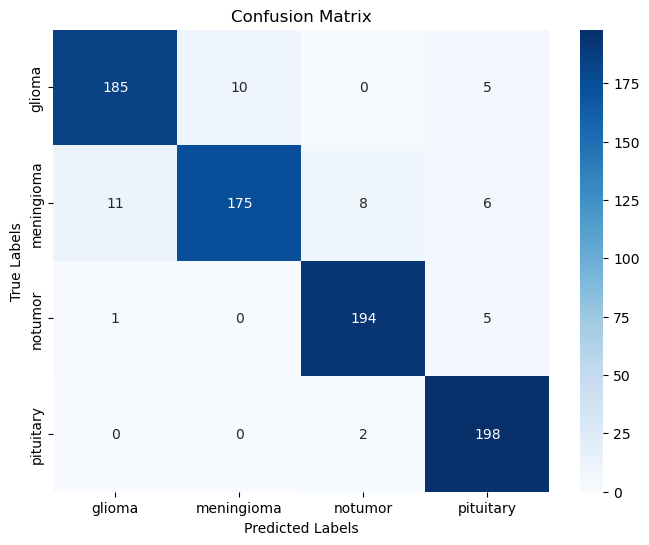

In [14]:
# Step 4: Visualize the Confusion Matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()